# TPOT
#### Automated Machine Learning
___

<b> Import modules

In [97]:
import pandas as pd
import numpy as np
import time

In [98]:
##################### MODULES TPOT ###################################
### source: http://epistasislab.github.io/tpot/installing/
### already installed in our environment by Prof. Tao in JupyterLab
# !pip install deap update_checker tqdm stopit --user
### for binary classification problem use TPOTClassifier
### already installed in our environment by Prof. Tao in JupyterLab
#!pip install tpot --user

<b> Import Dataset

In [99]:
# import file with data cleaned (one-hot encoded categorical features and feature-engineerd features)
df = pd.read_csv("df_calculation.csv")

<b> Optional shuffle the data

In [100]:
# It's generally a good idea to randomly shuffle the data before starting to avoid any type of ordering in the data.
# shuffle the dataset
df_shuffle = df.iloc[np.random.permutation(len(df))]
# reset the index numbers of the dataframe
df_shuffled = df_shuffle.reset_index(drop=True)
# show first 5 rows of the dataframe
df_shuffled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,avg_exit_bounce_rates,add_exit_bounce_rates,div_exit_bounce_rates,perc_exit_bounce_rates,Administrative_Duration_pp,Informational_Duration_pp,ProductRelated_Duration_pp
0,1,7.000000,0,0.0,20,887.583333,0.000000,0.016140,34.253368,0,...,0,0,1,0.008070,0.016140,0.00000,-1.00000,7.000000,0.000000,44.379167
1,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,...,0,1,0,0.200000,0.400000,1.00000,0.00000,0.000000,0.000000,0.000000
2,0,0.000000,0,0.0,12,312.033333,0.000000,0.009091,17.808000,0,...,0,0,1,0.004545,0.009091,0.00000,-1.00000,0.000000,0.000000,26.002778
3,0,0.000000,0,0.0,3,0.000000,0.200000,0.200000,0.000000,0,...,0,0,1,0.200000,0.400000,1.00000,0.00000,0.000000,0.000000,0.000000
4,12,432.583333,3,112.0,42,2132.683333,0.021289,0.041499,0.000000,0,...,0,0,1,0.031394,0.062787,0.51299,-0.48701,36.048611,37.333333,50.778175


In [101]:
# check missing values
(pd.isnull(df_shuffled).any()).value_counts()
# note: no missing values

False    87
dtype: int64

<b> Train Test Split Indices

In [102]:
# cross_validation train_test_split
from sklearn.model_selection import train_test_split

# define your target variable: Y
# The first and most important step in using TPOT on any data set is to rename the target class/response variable to class.
# source: https://github.com/EpistasisLab/tpot/blob/master/tutorials/Titanic_Kaggle.ipynb
df_shuffled.rename(columns={'Revenue': 'class'}, inplace=True)
df_class = df_shuffled['class'].values

# split the data into training and testing (75% training, 25% testing, random state = fixed)
training_indices, testing_indices = train_test_split(df_shuffled.index, stratify = df_class, train_size=0.75, test_size=0.25, random_state = 2019)

<b> Check Size of Train Test Split

In [103]:
# check the size of the training set and validation set
training_indices.size, testing_indices.size

(9247, 3083)

<b> Run TPOT - Automated Machine Learning Model

In [105]:
from tpot import TPOTClassifier

# set the start time
start = time.time()

# define the model

tpot = TPOTClassifier(generations=300, # Number of iterations to run the pipeline optimization process. It must be a positive number or None. If None, the parameter max_time_mins must be defined as the runtime limit. Generally, TPOT will work better when you give it more generations (and therefore time) to optimize the pipeline.
                      population_size=100,
                      offspring_size=100,
                      verbosity=2, # verbosity - How much information TPOT communicates while it is running. 
                      n_jobs=-1, # Number of CPUs for evaluating pipelines in parallel during the TPOT optimization process. Assigning this to -1 will use as many cores as available on the computer. For n_jobs below -1, (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one are used.
                      scoring='f1_weighted', # Function used to evaluate the quality of a given pipeline for the problem. By default, accuracy is used for classification and mean squared error (MSE) is used for regression. 
                      max_time_mins = 60, 
                      max_eval_time_mins= 10,
                      cv=10)

# train the model
tpot.fit(df_shuffled.drop('class',axis=1).loc[training_indices].values, # X_train
         df_shuffled.loc[training_indices, 'class'].values) # y_train

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Generation 1 - Current best internal CV score: 0.8996889364724592

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=8, min_child_weight=18, n_estimators=100, nthread=1, subsample=0.9500000000000001)
--- Execution time: ---
--- 1666844.584ms. --- 
--- 1666.8445839881897 seconds ---
--- 27.780743066469828 minutes ---


In [85]:
# note: for different scoring functions, see:
# source: https://epistasislab.github.io/tpot/using/#scoring-functions

In [106]:
# weighted f1 score which was the scoring method for tpot
tpot.score(df_shuffled.drop('class',axis=1).loc[testing_indices].values, #X_test
           df_shuffled.loc[testing_indices, 'class'].values) # y_test

0.8987252354361767

In [107]:
# source: https://iq.opengenus.org/tpot-python/
from sklearn.metrics import roc_auc_score
# calculate AUC score
tpot_auc_score = roc_auc_score(df_shuffled.loc[testing_indices, 'class'].values, tpot.predict_proba(df_shuffled.drop('class',axis=1).loc[testing_indices].values)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.9285


### Testrun 1
___
HBox(children=(FloatProgress(value=0.0, description='Optimization Progress', max=600.0, style=ProgressStyle(de…

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=15, min_samples_split=18, n_estimators=100)
<br> --- Execution time: ---
<br> --- 707084.034ms. --- 
<br> --- 707.0840344429016 seconds ---
<br> --- 11.784733907381694 minutes ---
<br> tpot.score = 0.9072333857032616
___
### Testrun 2
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=6, min_samples_split=15, n_estimators=100)
<br> --- Execution time: ---
<br> --- 424634.354ms. --- 
<br> --- 424.63435411453247 seconds ---
<br> --- 7.0772392352422075 minutes ---
<br> tpot.score = 0.9000766387617157
___
### Testrun 3
HBox(children=(FloatProgress(value=0.0, description='Optimization Progress', style=ProgressStyle(description_w…

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=8, min_samples_split=14, n_estimators=100)
<br> --- Execution time: ---
<br> --- 798850.751ms. --- 
<br> --- 798.8507509231567 seconds ---
<br> --- 13.314179182052612 minutes ---
<br> tpot.score = 0.9016232777560529
___
### Testrun 4
HBox(children=(FloatProgress(value=0.0, description='Optimization Progress', max=50.0, style=ProgressStyle(des…

Generation 1 - Current best internal CV score: 0.9028496916056253
Generation 2 - Current best internal CV score: 0.9028496916056253

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=9, min_samples_split=13, n_estimators=100)
--- Execution time: ---
<br> --- 1343828.360ms. --- 
<br> --- 1343.8283603191376 seconds ---
<br> --- 22.39713933865229 minutes ---
<br> tpot.score = 0.8989145659134411
<br> AUC score: 0.9283
___
### Testrun 5
HBox(children=(FloatProgress(value=0.0, description='Optimization Progress', style=ProgressStyle(description_w…

Best pipeline: XGBClassifier(MinMaxScaler(input_matrix), learning_rate=0.01, max_depth=10, min_child_weight=16, n_estimators=100, nthread=1, subsample=0.6500000000000001)
<br>--- Execution time: ---
<br> --- 1568095.310ms. --- 
<br> --- 1568.0953097343445 seconds ---
<br> --- 26.134921828905743 minutes --
<br> tpot.score = 0.9062844719301901
<br> AUC score: 0.9337

In [ ]:
# Export the optimized pipeline as Python code.
tpot.export('tpot_project2_pipeline.py')

## Apply TPOT model 1: 
> Random Forest, with hyperparameters suggested by TPOT:

In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("df_calculation.csv")

In [43]:
# Define Features and Target variables
X = df.drop('Revenue',axis=1) # Features is all columns in the dataframe except the last column
Y = df['Revenue'] # Target is the last column in the dataframe: 'Revenue'

In [44]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019) # 70% training and 30% test

In [45]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=2019, bootstrap=True, criterion='entropy', max_features=0.7500000000000001, min_samples_leaf=15, min_samples_split=18, n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.69      0.58      0.63       568

    accuracy                           0.89      3699
   macro avg       0.81      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699



<b> ROC Curve with AUC score

In [46]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

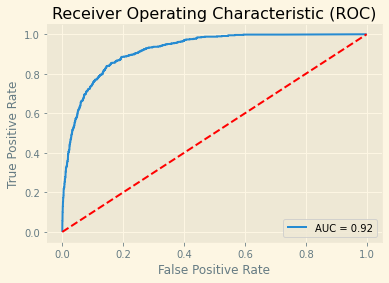

AUC score: 0.9210001304537542


In [47]:
# apply function to plot the ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<b> Cross Validation

In [50]:
# Build the k-fold cross-validator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')

result_f1_weighted = cross_val_score(clf, X, Y, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf, X, Y, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.89031778 0.88178429 0.89700872 0.91402871 0.8994874  0.90771371
 0.90742825 0.88936719 0.90701731 0.91392148] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9008 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.9172111  0.92191798 0.92518393 0.94666412 0.92355388 0.93649164
 0.94672694 0.92693049 0.93898523 0.94748639] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9331 



### Feature Importance

In [86]:
feature_imp = pd.Series(clf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
# show top 15 features
feature_imp.head(15)

PageValues                    0.568420
Month_Nov                     0.055507
ExitRates                     0.047511
ProductRelated_Duration       0.039807
ProductRelated                0.038503
BounceRates                   0.025821
ProductRelated_Duration_pp    0.025469
Administrative_Duration       0.024595
Administrative_Duration_pp    0.024033
add_exit_bounce_rates         0.022784
Month_May                     0.016740
Administrative                0.015819
avg_exit_bounce_rates         0.014408
Month_Mar                     0.012008
div_exit_bounce_rates         0.011246
dtype: float64

<b> Visualizing Important Features

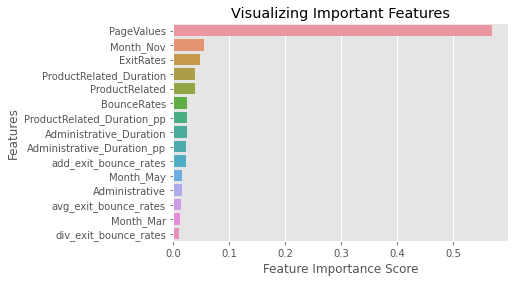

In [87]:
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

# Creating a bar plot
# for top 15 features
sns.barplot(x=feature_imp.head(15), y=feature_imp.head(15).index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Apply TPOT model 2: 
> XGBoost, with hyperparameters suggested by TPOT:

In [68]:
df = pd.read_csv("df_calculation.csv")

In [69]:
# Define Features and Target variables
X = df.drop('Revenue',axis=1) # Features is all columns in the dataframe except the last column
Y = df['Revenue'] # Target is the last column in the dataframe: 'Revenue'

In [70]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019) # 70% training and 30% test

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [72]:
# Train the XGboost Model for Classification
import xgboost as xgb
xgb0 = xgb.XGBClassifier(learning_rate=0.01, max_depth=10, min_child_weight=16, n_estimators=100, nthread=1, subsample=0.6500000000000001)
# MinMaxScaler(input_matrix), learning_rate=0.01, max_depth=10, min_child_weight=16, n_estimators=100, nthread=1, subsample=0.6500000000000001

# Train the model using the training sets
xgb0.fit(X_train, y_train)

# given a trained model, predict the label of a new set of data.
y_pred = xgb0.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.68      0.62      0.65       568

    accuracy                           0.90      3699
   macro avg       0.80      0.78      0.79      3699
weighted avg       0.89      0.90      0.89      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling)

In [73]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=xgb0):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

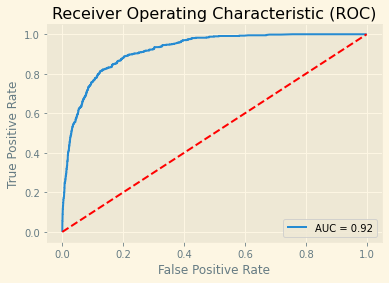

AUC score: 0.9199983918200997


In [74]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=xgb0)

### Cross Validation

In [75]:
# define evaluation procedure
k_fold_split = 10
cv = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
# evaluate model
result = cross_val_score(xgb0, X, Y, cv=cv, scoring='accuracy')
result_f1_weighted = cross_val_score(xgb0, X, Y, cv=cv, scoring='f1_weighted')
result_auc = cross_val_score(xgb0, X, Y, cv=cv, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.8937498  0.88450171 0.89532034 0.9139609  0.89571302 0.90674302
 0.90747665 0.89731823 0.90701731 0.91027132] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9012 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.92112104 0.91923395 0.926394   0.94250562 0.92379962 0.93719053
 0.94712218 0.92450719 0.93199694 0.94581782] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.93196888937

___
<b> Takeaways: </b>
<br> TPOT can be used as a suggestion to what model(s) can be employed and what optimal hyper-parameters to select, based on optimalizing the metric: <b> _'weighted f1 score'_ </b>, in this case. 
<br> After multiple runs, the most frequent and highest scores were achieved with the following models:
* <b> Random Forest Classifier </b>
 * hyper-parameters:  (bootstrap=True, criterion='entropy', max_features=0.7500000000000001, min_samples_leaf=15, min_samples_split=18, n_estimators=100)
 *  with average weighted f1-score of: 0.9008, and average AUC score of: 0.9331 (using Cross Validation with Kfold (10))
* <b> XGBoost Classifier </b>
 * hyper-parameters: (learning_rate=0.01, max_depth=10, min_child_weight=16, n_estimators=100, nthread=1, subsample=0.6500000000000001)
 *  with average weighted f1-score of: 0.9012 , and average AUC score of  0.9320 (using Cross Validation with Kfold (10))
___